# Mount Drive



# Importing Libraries and initializing stopwords and stemmer


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install texthero
!pip3 install transformers
!pip3 install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 65.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.8 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528002 sha256=8b3d01267987545c4cf90ab61f15fb9795d9b980bc710f80d82266293a02d04f
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [3]:
!pip install tweet-preprocessor

import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U spacy

In [5]:
import re 
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word
from nltk.corpus import words
nltk.download('words')
nltk.download('wordnet')
import re
from texthero import stopwords

from nltk.corpus import wordnet #to be learned

import tensorflow as tf

from nltk.corpus import stopwords

import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
import texthero as hero 

In [8]:
def lemma_per_pos(text):
    '''function to lemmatize according to part of speech tag'''
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text=text.lower()
    text = [word for word in text.split(" ")]
    text= [lemmatizer.lemmatize(token, "v") for token in text] #Lemmatization
    return " ".join(text)

def df_preprocessing(df,feature_col):
    '''
    Preprocessing of dataframe
    '''
    stop = set(stopwords.words('english'))
    df[feature_col]= (df[feature_col].pipe(hero.lowercase).
                      pipe(hero.remove_urls).
                      pipe(hero.remove_digits).
                      pipe(hero.remove_punctuation).
                      pipe(hero.remove_html_tags) )
    # lemmatization
    df[feature_col]= [lemma_per_pos(sent) for sent in df[feature_col]]
    #df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df

In [9]:
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import AdamW, get_linear_schedule_with_warmup
import tensorflow_addons as tfa

# Reading Data


In [10]:
data = pd.read_csv("/content/drive/MyDrive/capstone/data/fake reviews dataset.csv") #Your respective address 
data.head()
## change data

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


## ONE HOT ENCODING CLASS LABELS

In [11]:
def one_hot(data):
  column_names = ["text","Fake","Real"]
  test_df = pd.DataFrame(columns = column_names)

  for i in range(len(data)):
    text_temp = data['text_'].iloc[i]
    if data['label'].iloc[i] == "CG":
      test_df.loc[i] = [text_temp,1,0]
    elif data['label'].iloc[i] == "OR":
      test_df.loc[i] = [text_temp,0,1]
  return test_df


In [12]:
with tf.device('/GPU:0'): 
  data1=one_hot(data[['text_',"label"]])

In [13]:
data1

,text,Fake,Real
0,"Love this! Well made, sturdy, and very comfor...",1,0
1,"love it, a great upgrade from the original. I...",1,0
2,This pillow saved my back. I love the look and...,1,0
3,"Missing information on how to use it, but it i...",1,0
4,Very nice set. Good quality. We have had the s...,1,0
...,...,...,...
40427,I had read some reviews saying that this bra r...,0,1
40428,I wasn't sure exactly what it would be. It is ...,1,0
40429,"You can wear the hood by itself, wear it with ...",0,1
40430,I liked nothing about this dress. The only rea...,1,0


In [14]:
target_col= data1.columns[1:]
feature_col=data1.columns[0:1]

#Preprocessing

In [15]:
target_col,feature_col

(Index(['Fake', 'Real'], dtype='object'), Index(['text'], dtype='object'))

### preprocessing training and testing data

In [16]:
with tf.device('/GPU:0'): 
  data_prp= df_preprocessing(data1,feature_col[0])

In [17]:
#Creating tokenizer
def create_tokenizer(pretrained_weights='distilbert-base-uncased'):
  '''Function to create the tokenizer'''

  tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)
  return tokenizer

#Tokenization of the data
def data_tokenization(dataset,max_len,tokenizer):
    '''dataset: Pandas dataframe with feature name is column name 
    Pretrained_weights: selected model 
    RETURN: [input_ids, attention_mask]'''

    tokens = dataset.apply(lambda x: tokenizer(x,return_tensors='tf', 
                                                            truncation=True,
                                                            padding='max_length',
                                                            max_length=max_len, 
                                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)


    return [input_ids,attention_mask]

#Model 

### Freeze parameters

In [31]:
def distilbert_model(pretrained_weights,max_len,learning_rate):
  '''BERT model creation with pretrained weights
  INPUT:
  pretrained_weights: Language model pretrained weights
  max_len: input length '''
  print('Model selected:', pretrained_weights)
  bert=TFAutoModel.from_pretrained(pretrained_weights)
    # freeze all the parameters
  for layer in bert.layers:
      layer.trainable = False

  # # parameter declaration
  # step = tf.Variable(0, trainable=False)
  # schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [2e-0, 2e-1, 1e-2])
  # # lr and wd can be a function or a tensor
  # lr = learning_rate * schedule(step)
  # wd = lambda:lr * schedule(step)
  # optimizer = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

  # optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

  # declaring inputs, BERT take input_ids and attention_mask as input
  input_ids= Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
  attention_mask=Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

  bert= bert(input_ids,attention_mask=attention_mask)
  x= bert[0][:,0,:]
  x=tf.keras.layers.Dropout(0.05)(x)
  # x= tf.keras.layers.Dense(128)(x)
  x=tf.keras.layers.Dense(64)(x)
  x=tf.keras.layers.Dense(32)(x)

  output=tf.keras.layers.Dense(2,activation='sigmoid')(x)

  model=Model(inputs=[input_ids,attention_mask],outputs=[output])
  # compiling model 
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE,name='categorical_crossentropy'),
                metrics=['accuracy'])
  return model

In [46]:
pretrained_weights='distilbert-base-uncased'
max_len=256
epochs=6
learning_rate=2e-5
batch_size= None

In [48]:
tokenizer= create_tokenizer(pretrained_weights)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data_prp['text'], data_prp[['Fake','Real']], test_size=0.3, random_state=1,shuffle =True)

In [50]:
x_train= data_tokenization(X_train,max_len,tokenizer) 

In [51]:
y_train= y_train[target_col].values
y_train = y_train.astype('int32')
y_train

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int32)

In [52]:
y_train.shape

(28302, 2)

In [47]:
distilbert=distilbert_model(pretrained_weights,max_len,learning_rate)
distilbert.summary()

Model selected: distilbert-base-uncased


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Instructions for updating:
Lambda fuctions will be no more assumed to be

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 256, 768),                                                   
                                 hidden_states=None                                         

In [53]:
with tf.device('/GPU:0'):
    distilbert.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/6


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


885/885 [==============================] - 277s 304ms/step - loss: 0.5908 - accuracy: 0.6889
Epoch 2/6
885/885 [==============================] - 269s 304ms/step - loss: 0.4610 - accuracy: 0.7955
Epoch 3/6
885/885 [==============================] - 269s 304ms/step - loss: 0.4081 - accuracy: 0.8231
Epoch 4/6
885/885 [==============================] - 269s 304ms/step - loss: 0.3814 - accuracy: 0.8340
Epoch 5/6
885/885 [==============================] - 269s 304ms/step - loss: 0.3646 - accuracy: 0.8396
Epoch 6/6
885/885 [==============================] - 268s 303ms/step - loss: 0.3514 - accuracy: 0.8462


## tokenizing test data

In [54]:
x_test= data_tokenization(X_test,max_len,tokenizer)
x_test

[array([[ 101, 6581, 3643, ...,    0,    0,    0],
        [ 101, 1045, 2428, ...,    0,    0,    0],
        [ 101, 1045, 2293, ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2293, ...,    0,    0,    0],
        [ 101, 4965, 2023, ...,    0,    0,    0],
        [ 101, 1045, 2123, ...,    0,    0,    0]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)]

In [55]:
preds= distilbert.predict(x_test)

380/380 [==============================] - 108s 282ms/step


In [56]:
preds.shape
predicted_test_labels=pd.DataFrame(preds)

In [57]:
predicted_test_labels

,0,1
0,0.879819,0.518476
1,0.707577,0.623645
2,0.949423,0.298904
3,0.742112,0.393494
4,0.670816,0.609951
...,...,...
12125,0.875580,0.403246
12126,0.450516,0.664973
12127,0.678936,0.608490
12128,0.349039,0.860643


In [58]:
predicted_test_labels.columns=["Fake","Real"]

In [59]:
pred_labels=[]
for i in range(predicted_test_labels.shape[0]):
  temp = max(predicted_test_labels['Fake'].iloc[i],predicted_test_labels['Real'].iloc[i])
  if temp == predicted_test_labels['Fake'].iloc[i]:
    pred_labels.append('Fake')
  elif temp == predicted_test_labels['Real'].iloc[i]:
    pred_labels.append('Real')

In [60]:
true_labels = y_test.apply(lambda x: 'Fake' if x['Fake'] == 1 else 'Real', axis=1)
#true_labels = true_labels.replace({'Fake': 1, 'Real': 0})

In [61]:
from sklearn.metrics import classification_report

In [62]:
true_labels=list(true_labels)

## performance on hasoc test data 

In [63]:
print(classification_report(true_labels,pred_labels))

              precision    recall  f1-score   support

        Fake       0.80      0.93      0.86      6107
        Real       0.91      0.77      0.84      6023

    accuracy                           0.85     12130
   macro avg       0.86      0.85      0.85     12130
weighted avg       0.86      0.85      0.85     12130



In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

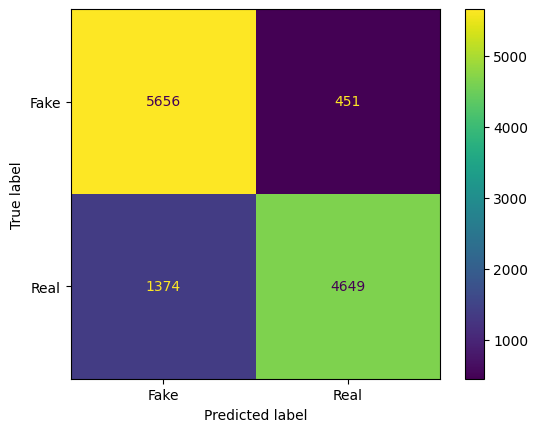

In [65]:
cm = confusion_matrix(true_labels, pred_labels, labels=["Fake","Real"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Fake","Real"])
disp.plot()
plt.show()